# import libraries

In [1]:
# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

# import 'is_string_dtype' and 'is_numeric_dtype' to check the data type 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'SciPy' is used to perform scientific computations
from scipy.stats import wilcoxon
from scipy import stats

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE


In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# Loading Data

In [4]:
# read csv file using pandas
Vehicle = pd.read_csv('C:\\Users\\ppluc\\Downloads\\Dataset\\Vehicle.csv')

# display the top 5 rows of the dataframe
Vehicle.head()


,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


# Base Model

## Without any cleaning and modification

In [5]:
num_Vehicle = Vehicle.select_dtypes(np.number)

In [6]:
cat_Vehicle = Vehicle.select_dtypes('object')

In [7]:
encoded = pd.get_dummies(cat_Vehicle, drop_first=True)

In [8]:
df_dummy = pd.concat([num_Vehicle, encoded], axis=1)

In [9]:
df_dummy = sm.add_constant(df_dummy)

X = df_dummy.drop('Kilometer_per_liter', axis=1)

y = df_dummy['Kilometer_per_liter']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("The size of X_train is ", X_train.shape)
print("The size of X_test is ", X_test.shape)
print('The size of y_train is ', y_train.shape)
print("The size of y_test is ", y_test.shape)

The size of X_train is  (318, 404)
The size of X_test is  (80, 404)
The size of y_train is  (318,)
The size of y_test is  (80,)


In [10]:
linreg_base_model = sm.OLS(y_train, X_train).fit()
print(linreg_base_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.996
Model:                             OLS   Adj. R-squared:                  0.930
Method:                  Least Squares   F-statistic:                     15.11
Date:                 Tue, 05 Jan 2021   Prob (F-statistic):           7.68e-09
Time:                         00:29:01   Log-Likelihood:                 34.457
No. Observations:                  318   AIC:                             529.1
Df Residuals:                       19   BIC:                             1654.
Df Model:                          298                                         
Covariance Type:             nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [11]:
linreg_base_model_prediction = linreg_base_model.predict(X_test)

In [12]:
linreg_base_model_rmse = rmse(y_test, linreg_base_model_prediction)
print(linreg_base_model_rmse)

linreg_base_model_rsquared = linreg_base_model.rsquared
print(linreg_base_model_rsquared)

linreg_base_model_rsquared_adj = linreg_base_model.rsquared_adj
print(linreg_base_model_rsquared_adj)

6.569508336925694
0.9957978605524669
0.9298906207964212


In [13]:
columns = ['Model','RMSE','R-Squared', 'Adj. R-Squared']

result_tabulation = pd.DataFrame(columns = columns)

def Model_Matrix(model_name, y_pred,models_name):
    matrics = pd.Series({'Model': str(models_name),
                        'RMSE': rmse(y_test, y_pred),
                        'R-Squared': model_name.rsquared,
                        'Adj. R-Squared': model_name.rsquared_adj})
    return matrics

In [14]:
result_tabulation = result_tabulation.append(Model_Matrix(linreg_base_model, linreg_base_model_prediction, 'Base_Model'), ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508,0.995798,0.929891


# EDA - Exploratory Data Analysis

In [15]:
Vehicle.shape

(398, 9)

In [16]:
Vehicle.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [17]:
Vehicle.describe(include = 'object')

,horsepower,name
count,398,398
unique,94,305
top,150,ford pinto
freq,22,6


In [18]:
# Removed insignificant feature
#Vehicle = Vehicle.drop('year', axis=1)

In [19]:
Vehicle.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

In [20]:
Vehicle.nunique()

origin                   3
cylinders                5
displacement            82
horsepower              94
weight                 351
acceleration            95
year                    13
name                   305
Kilometer_per_liter    129
dtype: int64

In [21]:
Vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [22]:
# converting some interger columns into categorical 

Vehicle['origin'] = Vehicle['origin'].astype(str)
Vehicle['cylinders'] = Vehicle['cylinders'].astype(str)

In [23]:
Vehicle['year'] = Vehicle['year'].astype(str)
Vehicle.drop('name', axis=1, inplace=True)

In [24]:
Vehicle['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
95     14
75     14
67     12
105    12
70     12
65     10
85      9
97      9
145     7
80      7
140     7
72      6
84      6
?       6
78      6
92      6
68      6
170     5
115     5
60      5
180     5
175     5
130     5
71      5
86      5
165     4
52      4
83      4
76      4
120     4
69      3
74      3
190     3
63      3
125     3
112     3
215     3
96      3
48      3
225     3
98      2
79      2
139     2
153     2
87      2
155     2
129     2
62      2
46      2
58      2
160     2
81      2
53      2
198     2
103     1
148     1
91      1
108     1
193     1
158     1
66      1
208     1
77      1
64      1
93      1
138     1
54      1
116     1
200     1
107     1
230     1
135     1
220     1
210     1
82      1
133     1
122     1
149     1
152     1
167     1
89      1
113     1
137     1
132     1
94      1
142     1
61      1
49      1
102     1
Name: horsepower, dtype: int64

In [25]:
# Vehicle have some insignificant value as "?"
# so we are making it as null value
# after that we can fill it by floor(mean) value
Vehicle['horsepower'].replace('?', np.NaN, inplace=True)

In [26]:
# convert horsepower from object to float

Vehicle['horsepower'] = Vehicle['horsepower'].astype("float64")

# we can convert like this also
# Vehicle['horsepower'] = pd.to_numeric(Vehicle['horsepower'],errors='coerce')

In [27]:
# checking missing values
Vehicle.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             6
weight                 0
acceleration           0
year                   0
Kilometer_per_liter    0
dtype: int64

In [28]:
from math import floor
mean = Vehicle.horsepower.mean()
mean = floor(mean)
mean

104

In [29]:
Vehicle['horsepower'].fillna(mean, inplace=True)

In [30]:
Vehicle.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
Kilometer_per_liter    0
dtype: int64

In [31]:
Vehicle_num = Vehicle.select_dtypes(np.number)
Vehicle_num.columns

Index(['displacement', 'horsepower', 'weight', 'acceleration',
       'Kilometer_per_liter'],
      dtype='object')

In [32]:
Vehicle_cat = Vehicle.select_dtypes('object')
Vehicle_cat.columns

Index(['origin', 'cylinders', 'year'], dtype='object')

In [33]:
Vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    object 
 1   cylinders            398 non-null    object 
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    object 
 7   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 25.0+ KB


In [34]:
Vehicle_num = Vehicle.select_dtypes(np.number)

In [35]:
Vehicle_cat = Vehicle.select_dtypes('object')

# Visualization

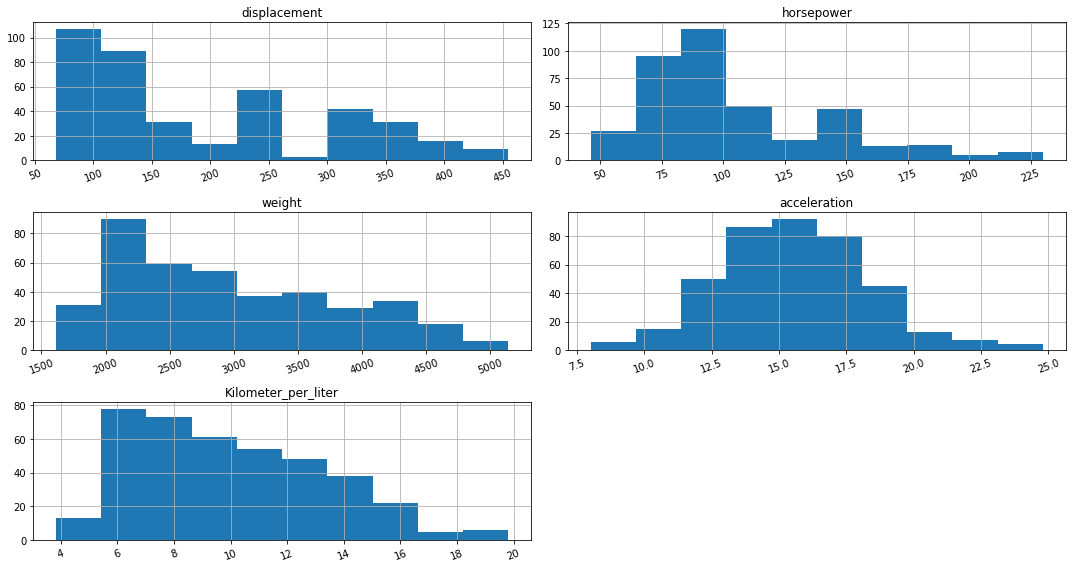

In [36]:
Vehicle.hist(xrot=20, )
plt.tight_layout()
plt.show()

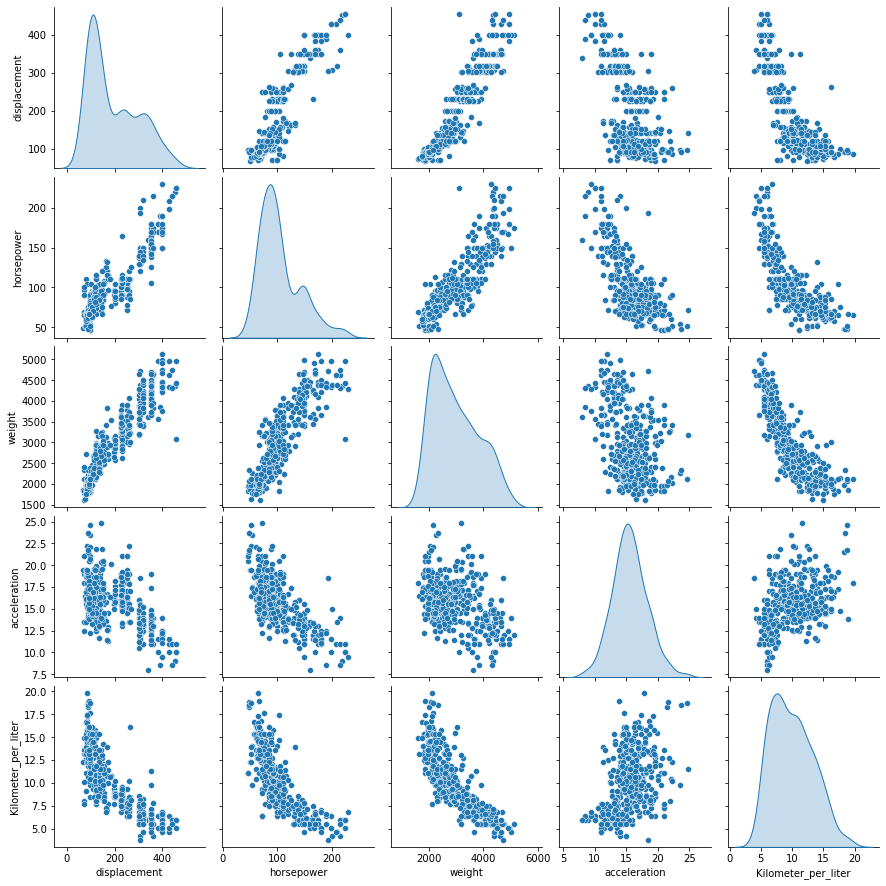

In [37]:
sns.pairplot(Vehicle_num, kind='scatter', diag_kind='kde')

<AxesSubplot:ylabel='count'>

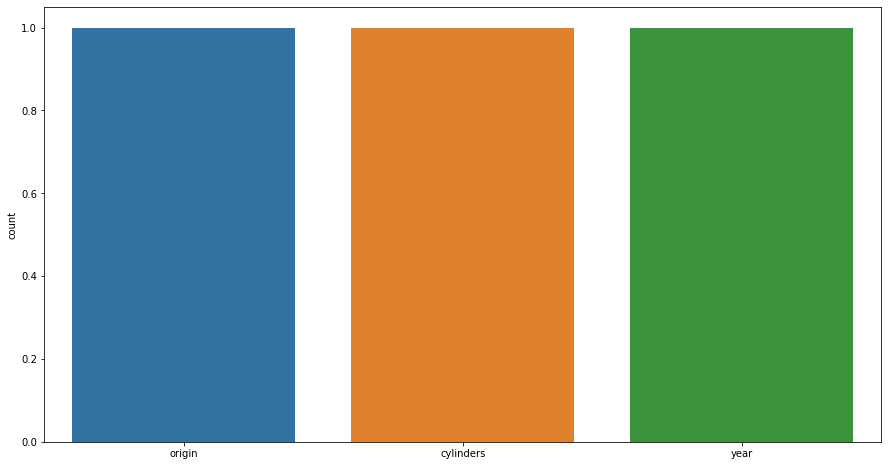

In [38]:
sns.countplot(Vehicle_cat.columns)

<AxesSubplot:xlabel='year', ylabel='Kilometer_per_liter'>

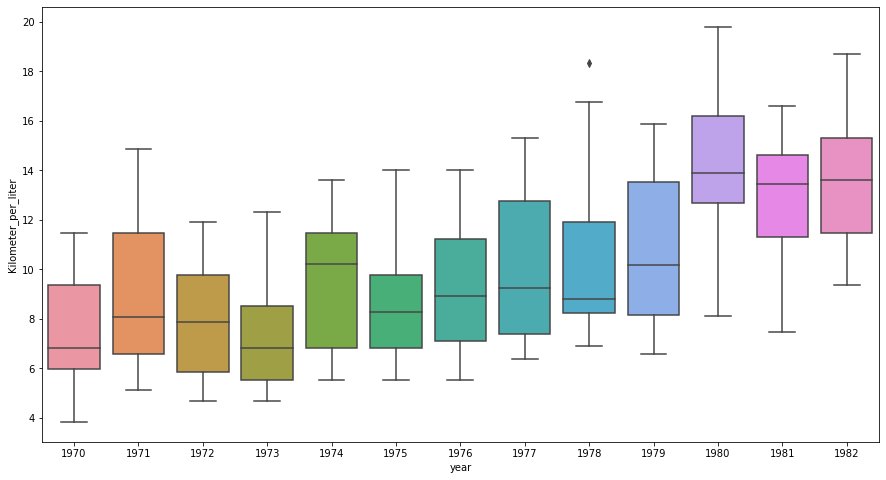

In [39]:
sns.boxplot(x = Vehicle['year'], y=Vehicle['Kilometer_per_liter'], data=Vehicle)

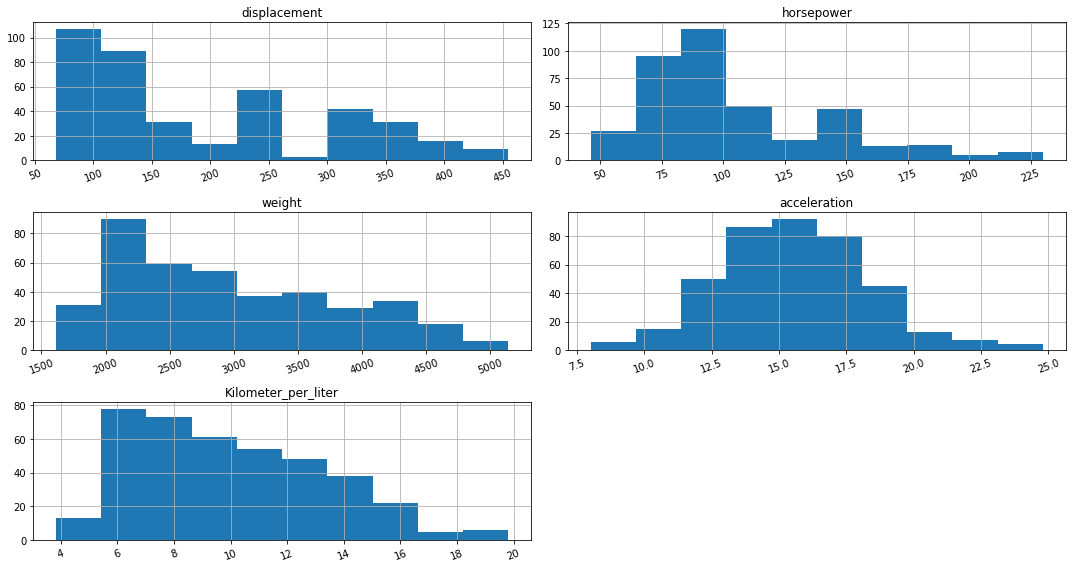

In [40]:
Vehicle.hist(xrot=20, )
plt.tight_layout()
plt.show()

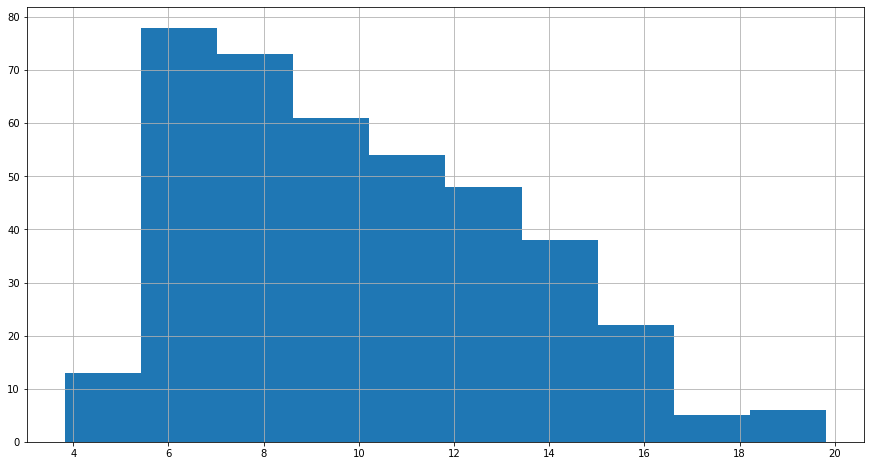

In [41]:
# Target variable
Vehicle['Kilometer_per_liter'].hist()
plt.show()

In [42]:
Vehicle['Kilometer_per_liter'].skew()

0.45706634399491836

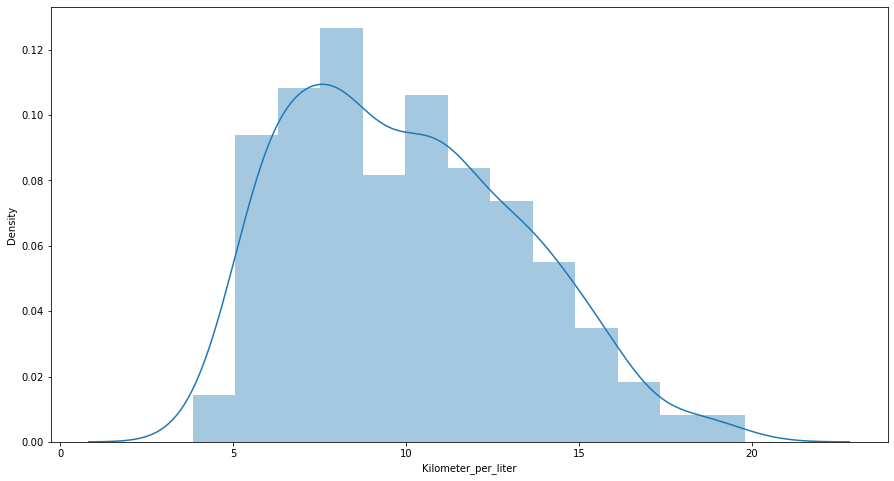

In [43]:
sns.distplot(Vehicle['Kilometer_per_liter'], hist=True)
plt.show()

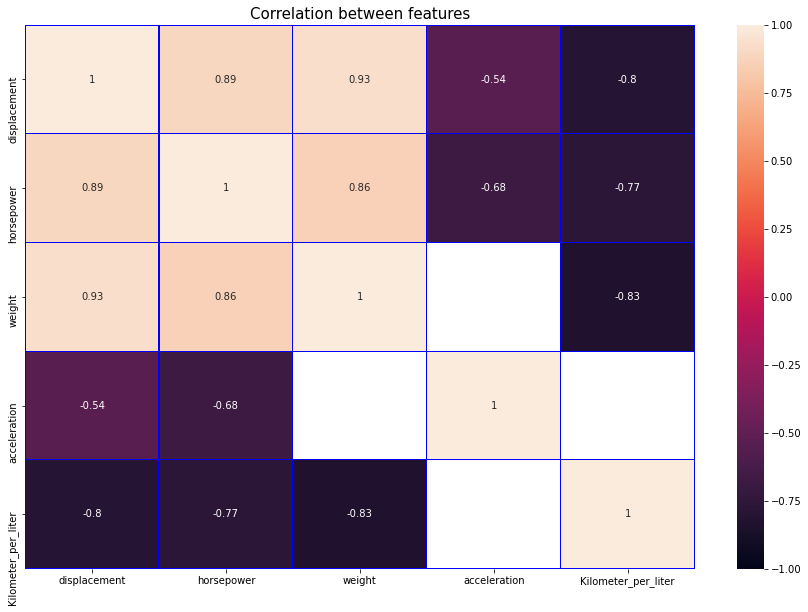

In [44]:
# Checking Correlation and correlation plot
# import matplotlib.pyplot as plt
# import seaborn as sns
correlation=Vehicle.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation[(correlation >= 0.5) | (correlation <= -0.5)],
            annot=True,linewidths=.1,linecolor="blue",vmax = 1, vmin = -1)
plt.title('Correlation between features', fontsize=15)
plt.show()

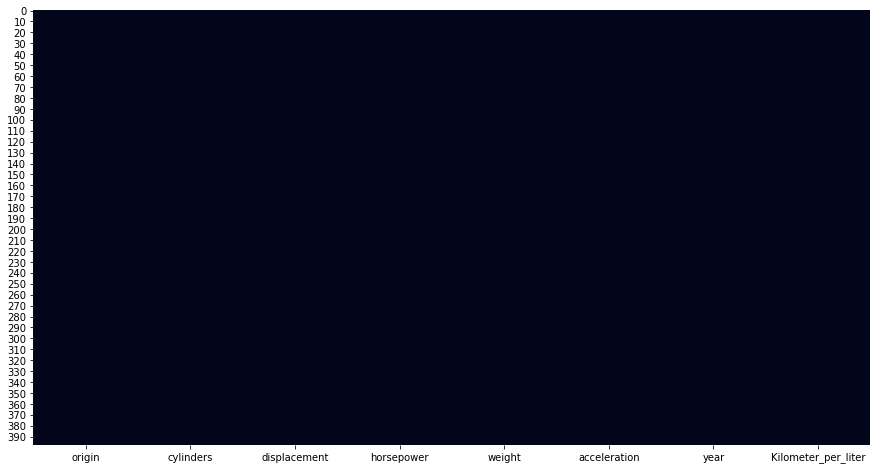

In [45]:
sns.heatmap(Vehicle.isnull(), cbar=False)
plt.show()

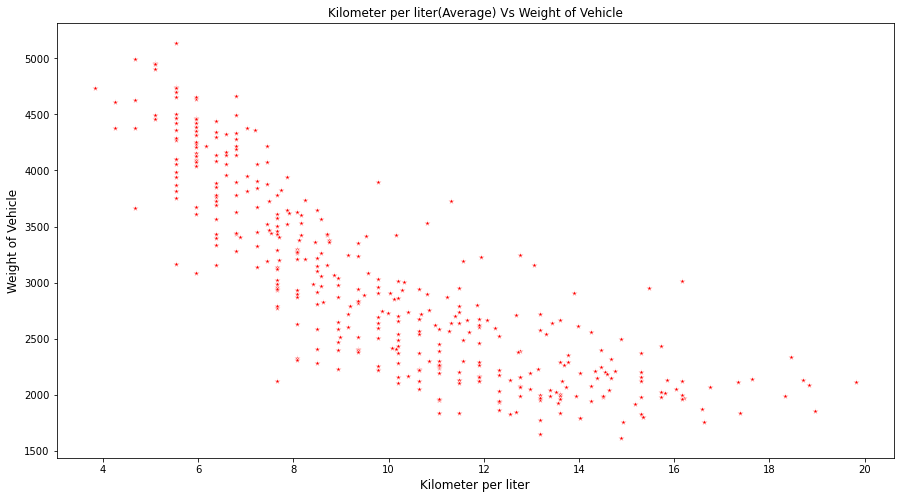

In [46]:
sns.scatterplot(x=  'Kilometer_per_liter', y='weight', data=Vehicle, marker='*', color='r')
plt.xlabel('Kilometer per liter', fontsize = 12)
plt.ylabel('Weight of Vehicle', fontsize=12)
plt.title('Kilometer per liter(Average) Vs Weight of Vehicle', fontsize=12)
plt.show()

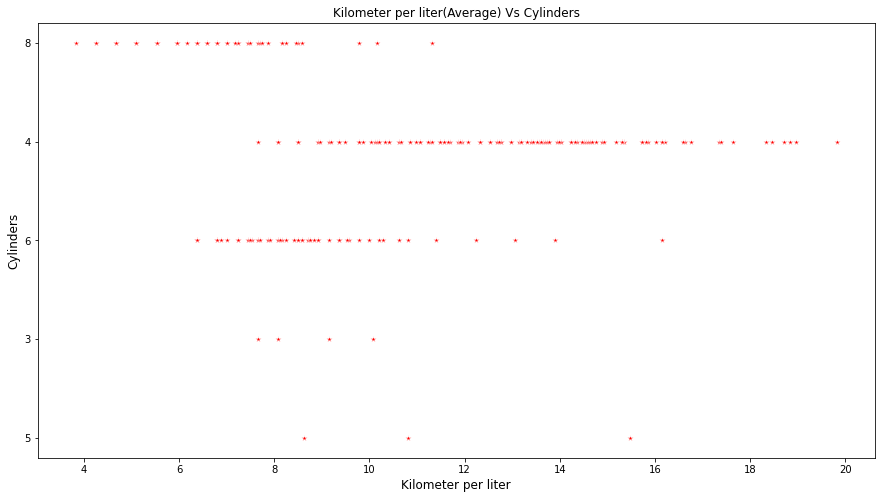

In [47]:
sns.scatterplot(x=  'Kilometer_per_liter', y='cylinders', data=Vehicle, marker='*', color='r')
plt.xlabel('Kilometer per liter', fontsize = 12)
plt.ylabel('Cylinders', fontsize=12)
plt.title('Kilometer per liter(Average) Vs Cylinders', fontsize=12)
plt.show()

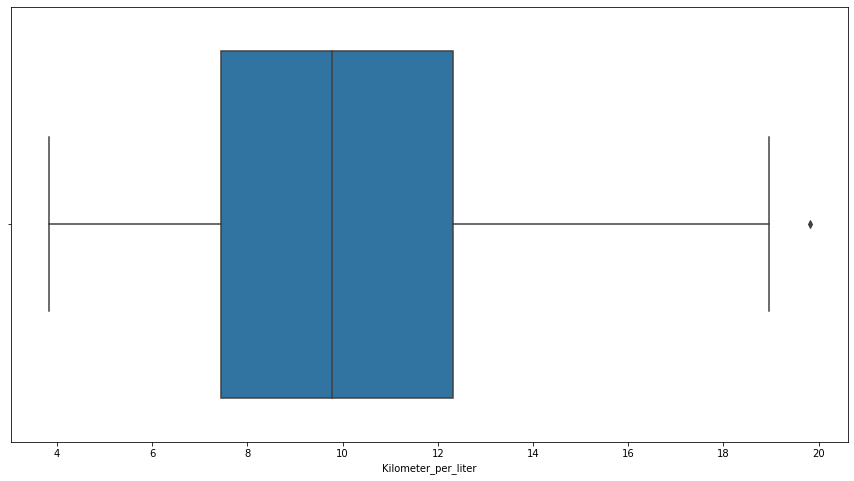

In [48]:
# checking outliers in dependent (Target Variable)
sns.boxplot(Vehicle['Kilometer_per_liter'])
plt.show()

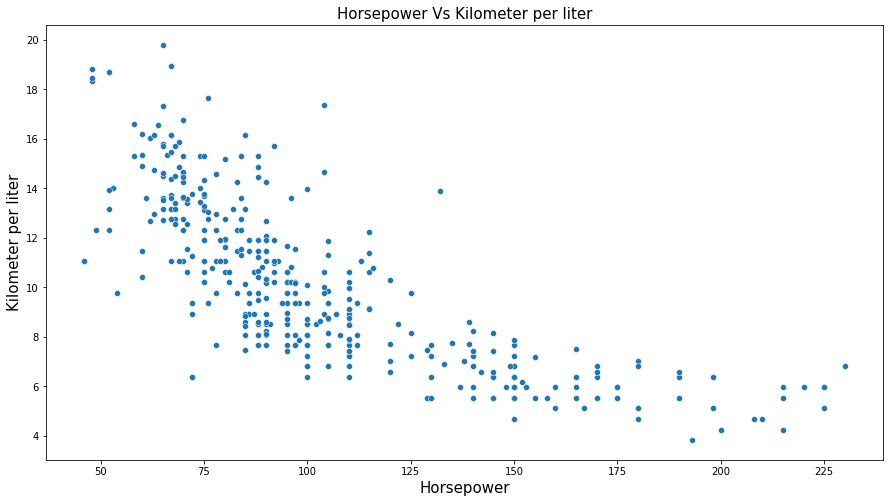

In [49]:
sns.scatterplot(y='Kilometer_per_liter', x = 'horsepower', data=Vehicle)
plt.xlabel('Horsepower', fontsize=15)
plt.ylabel('Kilometer per liter', fontsize=15)
plt.title('Horsepower Vs Kilometer per liter', fontsize=15)
plt.show()

### checking for null value

In [50]:
Vehicle.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
Kilometer_per_liter    0
dtype: int64

## performed wilcoxon test

In [51]:
stat, p = wilcoxon(Vehicle['Kilometer_per_liter'])

print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Accept Null Hypotheses')
else:
    print('Reject Null Hypotheses')

Statistics=0.000, p-value=0.000
Reject Null Hypotheses


## Splitting numeric and categorical features

In [52]:
df_num = Vehicle.select_dtypes(np.number)
df_num

,displacement,horsepower,weight,acceleration,Kilometer_per_liter
0,307.0,130.0,3504,12.0,7.652587
1,350.0,165.0,3693,11.5,6.377156
2,318.0,150.0,3436,11.0,7.652587
3,304.0,150.0,3433,12.0,6.802299
4,302.0,140.0,3449,10.5,7.227443
5,429.0,198.0,4341,10.0,6.377156
6,454.0,220.0,4354,9.0,5.952012
7,440.0,215.0,4312,8.5,5.952012
8,455.0,225.0,4425,10.0,5.952012
9,390.0,190.0,3850,8.5,6.377156


In [53]:
df_cat = Vehicle.select_dtypes('object')
df_cat

,origin,cylinders,year
0,1,8,1970
1,1,8,1970
2,1,8,1970
3,1,8,1970
4,1,8,1970
5,1,8,1970
6,1,8,1970
7,1,8,1970
8,1,8,1970
9,1,8,1970


## creating dummy variable

In [54]:
dummy_encoded_variable = pd.get_dummies(df_cat,drop_first=True)

In [55]:
df_dummy = pd.concat([df_num, dummy_encoded_variable], axis=1)

## splitting data into train test

In [56]:
df_dummy = sm.add_constant(df_dummy)

X = df_dummy.drop('Kilometer_per_liter', axis=1)

y = df_dummy['Kilometer_per_liter']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('The size of X_train is ', X_train.shape)
print('The size of X_test is ', X_test.shape)
print('The size of y_train is ', y_train.shape)
print('The size of y_test is ', y_test.shape)

The size of X_train is  (318, 23)
The size of X_test is  (80, 23)
The size of y_train is  (318,)
The size of y_test is  (80,)


# Model 1 

In [57]:
linreg_model1 = sm.OLS(y_train, X_train).fit()
print(linreg_model1.summary())

                             OLS Regression Results                            
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.868
Model:                             OLS   Adj. R-squared:                  0.858
Method:                  Least Squares   F-statistic:                     87.87
Date:                 Tue, 05 Jan 2021   Prob (F-statistic):          1.41e-115
Time:                         00:29:19   Log-Likelihood:                -514.13
No. Observations:                  318   AIC:                             1074.
Df Residuals:                      295   BIC:                             1161.
Df Model:                           22                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.4875      1.122    

In [58]:
linreg_prediction = linreg_model1.predict(X_test)

In [59]:
result_tabulation = result_tabulation.append(Model_Matrix(linreg_model1,linreg_prediction,'Model_1_OLS'), ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508,0.995798,0.929891
1,Model_1_OLS,1.054817,0.867604,0.857731


# Model 2 - VIF

In [60]:
Vehicle_features = Vehicle.drop('Kilometer_per_liter', axis=1)

Vehicle_num_features = Vehicle_features.select_dtypes(np.number)

In [61]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(Vehicle_num_features.values, i) for i in range(Vehicle_num_features.shape[1])]

# create a column of variable names
vif["Features"] = Vehicle_num_features.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,133.646118,weight
1,45.543562,displacement
2,40.692060,horsepower
3,20.175404,acceleration


In [62]:
for ind in range(len(Vehicle_num_features.columns)):
    
    vif = pd.DataFrame()
    
    vif["VIF_Factor"] = [variance_inflation_factor(Vehicle_num_features.values, i) for i in range(Vehicle_num_features.shape[1])]
    
    vif["Features"] = Vehicle_num_features.columns
    
    multi = vif[vif['VIF_Factor'] > 10]
    
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
        
    if (df_sorted.empty == False):
        Vehicle_num_features = Vehicle_num_features.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor      Features
0    3.085497  displacement
1    3.085497  acceleration


In [63]:
Vehi_cat = Vehicle.select_dtypes('object')

In [64]:
dummy_encoded_variable = pd.get_dummies(Vehi_cat,drop_first=True)

In [65]:
df_dummy = pd.concat([Vehicle_num_features, dummy_encoded_variable], axis=1)

In [66]:
df_dummy = sm.add_constant(df_dummy)

X = df_dummy.copy()

y = Vehicle['Kilometer_per_liter']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

print('The size of X_train is ', X_train.shape)
print('The size of X_test is ', X_test.shape)
print('The size of y_train is ', y_train.shape)
print('The size of y_test is ', y_test.shape)

The size of X_train is  (318, 21)
The size of X_test is  (80, 21)
The size of y_train is  (318,)
The size of y_test is  (80,)


In [67]:
linreg_vif = sm.OLS(y_train, X_train).fit()
print(linreg_vif.summary())

                             OLS Regression Results                            
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.812
Model:                             OLS   Adj. R-squared:                  0.799
Method:                  Least Squares   F-statistic:                     63.97
Date:                 Tue, 05 Jan 2021   Prob (F-statistic):           4.49e-95
Time:                         00:29:20   Log-Likelihood:                -570.21
No. Observations:                  318   AIC:                             1182.
Df Residuals:                      297   BIC:                             1261.
Df Model:                           20                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.6822      1.108    

In [68]:
linreg_vif_prediction = linreg_vif.predict(X_test)

In [69]:
result_tabulation = result_tabulation.append(Model_Matrix(linreg_vif,linreg_vif_prediction,'Model_vif'), ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508,0.995798,0.929891
1,Model_1_OLS,1.054817,0.867604,0.857731
2,Model_vif,1.156911,0.811605,0.798919


# Model3 - New Feature (Age)

In [70]:
Vehicle.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,7.227443


In [71]:
Current_age = 2021

In [72]:
Vehicle['year'] = Vehicle['year'].astype(float)

In [73]:
Vehicle['Age'] = Current_age - Vehicle['year']
Vehicle.drop('year', axis=1,inplace=True)
Vehicle.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter,Age
0,1,8,307.0,130.0,3504,12.0,7.652587,51.0
1,1,8,350.0,165.0,3693,11.5,6.377156,51.0
2,1,8,318.0,150.0,3436,11.0,7.652587,51.0
3,1,8,304.0,150.0,3433,12.0,6.802299,51.0
4,1,8,302.0,140.0,3449,10.5,7.227443,51.0


In [74]:
Vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    object 
 1   cylinders            398 non-null    object 
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   Kilometer_per_liter  398 non-null    float64
 7   Age                  398 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 25.0+ KB


In [75]:
Vehicle['Age'] = Vehicle['Age'].astype(str)

In [76]:
Vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    object 
 1   cylinders            398 non-null    object 
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   Kilometer_per_liter  398 non-null    float64
 7   Age                  398 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 25.0+ KB


In [77]:
Vehicle_numeric = Vehicle.select_dtypes(np.number)
Vehicle_numeric.columns

Index(['displacement', 'horsepower', 'weight', 'acceleration',
       'Kilometer_per_liter'],
      dtype='object')

In [78]:
Vehicle_categorical = Vehicle.select_dtypes('object')
Vehicle_categorical.columns

Index(['origin', 'cylinders', 'Age'], dtype='object')

In [79]:
dummy_categorical = pd.get_dummies(Vehicle_categorical, drop_first=True)

In [80]:
df_dummy = pd.concat([Vehicle_numeric, dummy_categorical], axis=1)
df_dummy.head()

,displacement,horsepower,weight,acceleration,Kilometer_per_liter,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,Age_40.0,Age_41.0,Age_42.0,Age_43.0,Age_44.0,Age_45.0,Age_46.0,Age_47.0,Age_48.0,Age_49.0,Age_50.0,Age_51.0
0,307.0,130.0,3504,12.0,7.652587,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,350.0,165.0,3693,11.5,6.377156,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,318.0,150.0,3436,11.0,7.652587,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,304.0,150.0,3433,12.0,6.802299,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,302.0,140.0,3449,10.5,7.227443,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [81]:
df_dummy = sm.add_constant(df_dummy)

X = df_dummy.drop('Kilometer_per_liter', axis=1)

y = df_dummy['Kilometer_per_liter']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('The size of X_train is ', X_train.shape)
print('The size of X_test is ', X_test.shape)
print('The size of y_train is ', y_train.shape)
print('The size of y_test is ', y_test.shape)

The size of X_train is  (318, 23)
The size of X_test is  (80, 23)
The size of y_train is  (318,)
The size of y_test is  (80,)


In [82]:
linreg_newfeature_ols = sm.OLS(y_train, X_train).fit()
print(linreg_newfeature_ols.summary())

                             OLS Regression Results                            
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.868
Model:                             OLS   Adj. R-squared:                  0.858
Method:                  Least Squares   F-statistic:                     87.87
Date:                 Tue, 05 Jan 2021   Prob (F-statistic):          1.41e-115
Time:                         00:29:23   Log-Likelihood:                -514.13
No. Observations:                  318   AIC:                             1074.
Df Residuals:                      295   BIC:                             1161.
Df Model:                           22                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           17.0479      1.106    

In [83]:
linreg_newfeature_ols_prediction = linreg_newfeature_ols.predict(X_test)

In [84]:
result_tabulation = result_tabulation.append(Model_Matrix(linreg_newfeature_ols,linreg_newfeature_ols_prediction,'New Feature(Age)'), ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508,0.995798,0.929891
1,Model_1_OLS,1.054817,0.867604,0.857731
2,Model_vif,1.156911,0.811605,0.798919
3,New Feature(Age),1.054817,0.867604,0.857731


# Model4 = sklearn LinearRegression 

In [85]:
linreg_newfeature = LinearRegression()
model = linreg_newfeature.fit(X_train, y_train)

In [86]:
linreg_newfeature_predections = linreg_newfeature.predict(X_test)

In [87]:
def LinearModel(y_pred, models_name):
    N = X_train.shape[0] + y_train.shape[0]
    P = X_train.shape[1]
    R = metrics.r2_score(y_test, y_pred)
    
    model_matrix = pd.Series({'Model': str(models_name),
                        'RMSE': np.sqrt(metrics.mean_squared_error(y_test,y_pred)),
                        'R-Squared': R,
                             'Adj. R-Squared': (1-((1-(R))*(N-1))/(N-P-1))})
    return model_matrix

In [88]:
result_tabulation = result_tabulation.append(LinearModel(linreg_newfeature_predections,'Linear_Regression'),ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508,0.995798,0.929891
1,Model_1_OLS,1.054817,0.867604,0.857731
2,Model_vif,1.156911,0.811605,0.798919
3,New Feature(Age),1.054817,0.867604,0.857731
4,Linear_Regression,1.054817,0.890741,0.886635


# ADABOOST Regressor model

In [89]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor()

In [90]:
model = adaboost.fit(X_train, y_train)

In [91]:
adaboost_pred = adaboost.predict(X_test)

In [92]:
result_tabulation = result_tabulation.append(LinearModel(adaboost_pred, 'Adaboost_Regressor'), ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508,0.995798,0.929891
1,Model_1_OLS,1.054817,0.867604,0.857731
2,Model_vif,1.156911,0.811605,0.798919
3,New Feature(Age),1.054817,0.867604,0.857731
4,Linear_Regression,1.054817,0.890741,0.886635
5,Adaboost_Regressor,1.259028,0.844341,0.838491


# Bagging Regressor Model

In [93]:
from sklearn.ensemble import BaggingRegressor
bagging_reg = BaggingRegressor()
model = bagging_reg.fit(X_train, y_train)
bagging_reg_pred = bagging_reg.predict(X_test)

In [94]:
result_tabulation = result_tabulation.append(LinearModel(bagging_reg_pred, 'Bagging_Regressor'), ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508,0.995798,0.929891
1,Model_1_OLS,1.054817,0.867604,0.857731
2,Model_vif,1.156911,0.811605,0.798919
3,New Feature(Age),1.054817,0.867604,0.857731
4,Linear_Regression,1.054817,0.890741,0.886635
5,Adaboost_Regressor,1.259028,0.844341,0.838491
6,Bagging_Regressor,1.309333,0.831654,0.825327


# Extra Trees Regressor Model

In [95]:
from sklearn.ensemble import ExtraTreesRegressor
extraTrees = ExtraTreesRegressor()
model = extraTrees.fit(X_train,y_train)

In [96]:
extraTrees_pred = extraTrees.predict(X_test)

In [97]:
result_tabulation = result_tabulation.append(LinearModel(extraTrees_pred, 'Extra Trees Regressor'), ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508,0.995798,0.929891
1,Model_1_OLS,1.054817,0.867604,0.857731
2,Model_vif,1.156911,0.811605,0.798919
3,New Feature(Age),1.054817,0.867604,0.857731
4,Linear_Regression,1.054817,0.890741,0.886635
5,Adaboost_Regressor,1.259028,0.844341,0.838491
6,Bagging_Regressor,1.309333,0.831654,0.825327
7,Extra Trees Regressor,1.188921,0.861194,0.855977


# Gradient Boosting Regressor Model

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
Grad = GradientBoostingRegressor()
model = Grad.fit(X_train, y_train)
Grad_pred = Grad.predict(X_test)

In [99]:
result_tabulation = result_tabulation.append(LinearModel(Grad_pred, 'Gradient Boosting Regressor'), ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508,0.995798,0.929891
1,Model_1_OLS,1.054817,0.867604,0.857731
2,Model_vif,1.156911,0.811605,0.798919
3,New Feature(Age),1.054817,0.867604,0.857731
4,Linear_Regression,1.054817,0.890741,0.886635
5,Adaboost_Regressor,1.259028,0.844341,0.838491
6,Bagging_Regressor,1.309333,0.831654,0.825327
7,Extra Trees Regressor,1.188921,0.861194,0.855977
8,Gradient Boosting Regressor,1.113294,0.878291,0.873717


# Random Forest Regressor Model

In [100]:
from sklearn.ensemble import RandomForestRegressor
Rand = RandomForestRegressor()
model = Rand.fit(X_train, y_train)
Rand_pred = Rand.predict(X_test)

In [101]:
result_tabulation = result_tabulation.append(LinearModel(Rand_pred, 'Random Forest Regressor'), ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508,0.995798,0.929891
1,Model_1_OLS,1.054817,0.867604,0.857731
2,Model_vif,1.156911,0.811605,0.798919
3,New Feature(Age),1.054817,0.867604,0.857731
4,Linear_Regression,1.054817,0.890741,0.886635
5,Adaboost_Regressor,1.259028,0.844341,0.838491
6,Bagging_Regressor,1.309333,0.831654,0.825327
7,Extra Trees Regressor,1.188921,0.861194,0.855977
8,Gradient Boosting Regressor,1.113294,0.878291,0.873717
9,Random Forest Regressor,1.242916,0.848300,0.842598


# KNN Regressor Model

In [102]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
model = knn.fit(X_train, y_train)
Log_pred = knn.predict(X_test)

In [103]:
result_tabulation = result_tabulation.append(LinearModel(Log_pred,'KNN Regressor'), ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508,0.995798,0.929891
1,Model_1_OLS,1.054817,0.867604,0.857731
2,Model_vif,1.156911,0.811605,0.798919
3,New Feature(Age),1.054817,0.867604,0.857731
4,Linear_Regression,1.054817,0.890741,0.886635
5,Adaboost_Regressor,1.259028,0.844341,0.838491
6,Bagging_Regressor,1.309333,0.831654,0.825327
7,Extra Trees Regressor,1.188921,0.861194,0.855977
8,Gradient Boosting Regressor,1.113294,0.878291,0.873717
9,Random Forest Regressor,1.242916,0.848300,0.842598


# Decision Tree Regressor Model

In [104]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
model = DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

In [105]:
result_tabulation = result_tabulation.append(LinearModel(DT_pred, 'Dicision Tree Regressor'), ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508,0.995798,0.929891
1,Model_1_OLS,1.054817,0.867604,0.857731
2,Model_vif,1.156911,0.811605,0.798919
3,New Feature(Age),1.054817,0.867604,0.857731
4,Linear_Regression,1.054817,0.890741,0.886635
5,Adaboost_Regressor,1.259028,0.844341,0.838491
6,Bagging_Regressor,1.309333,0.831654,0.825327
7,Extra Trees Regressor,1.188921,0.861194,0.855977
8,Gradient Boosting Regressor,1.113294,0.878291,0.873717
9,Random Forest Regressor,1.242916,0.848300,0.842598


# XGB Regressor Model

In [106]:
from xgboost import XGBRegressor
xg = XGBRegressor()
model = xg.fit(X_train, y_train)
xg_pred = xg.predict(X_test)

In [107]:
result_tabulation = result_tabulation.append(LinearModel(xg_pred, 'XGBoost Regressor'), ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508,0.995798,0.929891
1,Model_1_OLS,1.054817,0.867604,0.857731
2,Model_vif,1.156911,0.811605,0.798919
3,New Feature(Age),1.054817,0.867604,0.857731
4,Linear_Regression,1.054817,0.890741,0.886635
5,Adaboost_Regressor,1.259028,0.844341,0.838491
6,Bagging_Regressor,1.309333,0.831654,0.825327
7,Extra Trees Regressor,1.188921,0.861194,0.855977
8,Gradient Boosting Regressor,1.113294,0.878291,0.873717
9,Random Forest Regressor,1.242916,0.848300,0.842598


# SVR Model

In [108]:
from sklearn.svm import SVR
sv = SVR()
model = sv.fit(X_train, y_train)
sv_pred = sv.predict(X_test)

In [109]:
result_tabulation = result_tabulation.append(LinearModel(sv_pred, 'SVR'), ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508,0.995798,0.929891
1,Model_1_OLS,1.054817,0.867604,0.857731
2,Model_vif,1.156911,0.811605,0.798919
3,New Feature(Age),1.054817,0.867604,0.857731
4,Linear_Regression,1.054817,0.890741,0.886635
5,Adaboost_Regressor,1.259028,0.844341,0.838491
6,Bagging_Regressor,1.309333,0.831654,0.825327
7,Extra Trees Regressor,1.188921,0.861194,0.855977
8,Gradient Boosting Regressor,1.113294,0.878291,0.873717
9,Random Forest Regressor,1.242916,0.848300,0.842598


# SGD

In [110]:
from sklearn.linear_model import SGDRegressor

# build the model
SGD_model = SGDRegressor()

# fit the model
SGD_model.fit(X_train, y_train)
SGD_pred = SGD_model.predict(X_test)

In [111]:
result_tabulation = result_tabulation.append(LinearModel(SGD_pred, 'SGD Model'), ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508e+00,9.957979e-01,9.298906e-01
1,Model_1_OLS,1.054817e+00,8.676043e-01,8.577307e-01
2,Model_vif,1.156911e+00,8.116054e-01,7.989188e-01
3,New Feature(Age),1.054817e+00,8.676043e-01,8.577307e-01
4,Linear_Regression,1.054817e+00,8.907411e-01,8.866350e-01
5,Adaboost_Regressor,1.259028e+00,8.443411e-01,8.384912e-01
6,Bagging_Regressor,1.309333e+00,8.316540e-01,8.253272e-01
7,Extra Trees Regressor,1.188921e+00,8.611938e-01,8.559772e-01
8,Gradient Boosting Regressor,1.113294e+00,8.782910e-01,8.737169e-01
9,Random Forest Regressor,1.242916e+00,8.482996e-01,8.425984e-01


# SGD with Random SearchCV

In [112]:
loss = ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalty = ['l2', 'l1', 'elasticnet']
alpha = [i for i in np.linspace(0.0001, 1)]
max_iter = [100,500,1000]
learning_rate = ['invscaling','adaptive','adaptive']

In [113]:
params_sgd = {'loss':loss, 'penalty':penalty, 'alpha':alpha,'max_iter':max_iter, 'learning_rate':learning_rate}

In [114]:
from sklearn.model_selection import RandomizedSearchCV
rand = RandomizedSearchCV(estimator = SGD_model, param_distributions=params_sgd)

In [115]:
rand.fit(X_train, y_train)

RandomizedSearchCV(estimator=SGDRegressor(),
                   param_distributions={'alpha': [0.0001, 0.02050612244897959,
                                                  0.04091224489795919,
                                                  0.06131836734693878,
                                                  0.08172448979591837,
                                                  0.10213061224489796,
                                                  0.12253673469387756,
                                                  0.14294285714285712,
                                                  0.16334897959183672,
                                                  0.18375510204081633,
                                                  0.2041612244897959,
                                                  0.2245673469387755,
                                                  0.2449734693877551,
                                                  0.2653795918367347,
                            

In [116]:
rand.best_params_

{'penalty': 'l1',
 'max_iter': 1000,
 'loss': 'huber',
 'learning_rate': 'adaptive',
 'alpha': 0.7347204081632653}

In [117]:
from sklearn.linear_model import SGDRegressor

# build the model
SGD_model = SGDRegressor(loss='huber', penalty='elasticnet', alpha=0.12253673469387756,max_iter=1000, learning_rate='adaptive')

# fit the model
SGD_model.fit(X_train, y_train)
SGD_pred = SGD_model.predict(X_test)

In [118]:
result_tabulation = result_tabulation.append(LinearModel(SGD_pred, 'SGD with Random searchCV'), ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508e+00,9.957979e-01,9.298906e-01
1,Model_1_OLS,1.054817e+00,8.676043e-01,8.577307e-01
2,Model_vif,1.156911e+00,8.116054e-01,7.989188e-01
3,New Feature(Age),1.054817e+00,8.676043e-01,8.577307e-01
4,Linear_Regression,1.054817e+00,8.907411e-01,8.866350e-01
5,Adaboost_Regressor,1.259028e+00,8.443411e-01,8.384912e-01
6,Bagging_Regressor,1.309333e+00,8.316540e-01,8.253272e-01
7,Extra Trees Regressor,1.188921e+00,8.611938e-01,8.559772e-01
8,Gradient Boosting Regressor,1.113294e+00,8.782910e-01,8.737169e-01
9,Random Forest Regressor,1.242916e+00,8.482996e-01,8.425984e-01


# SGD with Grid SearchCV

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
grid = GridSearchCV(estimator=SGD_model, param_grid=params_sgd, cv=5)

In [121]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SGDRegressor(alpha=0.12253673469387756,
                                    learning_rate='adaptive', loss='huber',
                                    penalty='elasticnet'),
             param_grid={'alpha': [0.0001, 0.02050612244897959,
                                   0.04091224489795919, 0.06131836734693878,
                                   0.08172448979591837, 0.10213061224489796,
                                   0.12253673469387756, 0.14294285714285712,
                                   0.16334897959183672, 0.18375510204081633,
                                   0.2041612244897...
                                   0.449034693877551, 0.4694408163265306,
                                   0.4898469387755102, 0.5102530612244898,
                                   0.5306591836734694, 0.551065306122449,
                                   0.5714714285714285, 0.5918775510204082, ...],
                         'learning_rate': ['invscalin

In [122]:
grid.best_params_

{'alpha': 0.9591877551020408,
 'learning_rate': 'adaptive',
 'loss': 'huber',
 'max_iter': 500,
 'penalty': 'l2'}

In [123]:
from sklearn.linear_model import SGDRegressor

# build the model
SGD_model = SGDRegressor(loss='huber', penalty='l2', alpha=0.8163448979591836,max_iter=100, learning_rate='adaptive')

# fit the model
SGD_model.fit(X_train, y_train)
SGD_pred = SGD_model.predict(X_test)

In [124]:
result_tabulation = result_tabulation.append(LinearModel(SGD_pred, 'SGD Model with Grid SearchCV'), ignore_index=True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Base_Model,6.569508e+00,9.957979e-01,9.298906e-01
1,Model_1_OLS,1.054817e+00,8.676043e-01,8.577307e-01
2,Model_vif,1.156911e+00,8.116054e-01,7.989188e-01
3,New Feature(Age),1.054817e+00,8.676043e-01,8.577307e-01
4,Linear_Regression,1.054817e+00,8.907411e-01,8.866350e-01
5,Adaboost_Regressor,1.259028e+00,8.443411e-01,8.384912e-01
6,Bagging_Regressor,1.309333e+00,8.316540e-01,8.253272e-01
7,Extra Trees Regressor,1.188921e+00,8.611938e-01,8.559772e-01
8,Gradient Boosting Regressor,1.113294e+00,8.782910e-01,8.737169e-01
9,Random Forest Regressor,1.242916e+00,8.482996e-01,8.425984e-01
